In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('imdb_top_1000.csv',thousands=',')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [3]:
df=df.drop(['Poster_Link', 'Overview'],axis=1)
df=df.drop(['Certificate'],axis=1)
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# <h1>Q1. Analysis of the gross of a movie vs directors.</h1>
<p>Here we first take a mean for changing a value of NAN in dataset for getting a more correct data </p> 

In [4]:
m= int(df["Gross"].mean())
df['Gross'].fillna(value=m, inplace=True)
df.isnull().sum()

Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

           Gross       Director
477  936662225.0    J.J. Abrams
59   858373000.0  Anthony Russo
623  760507625.0  James Cameron
60   678815482.0  Anthony Russo
652  659325379.0  James Cameron




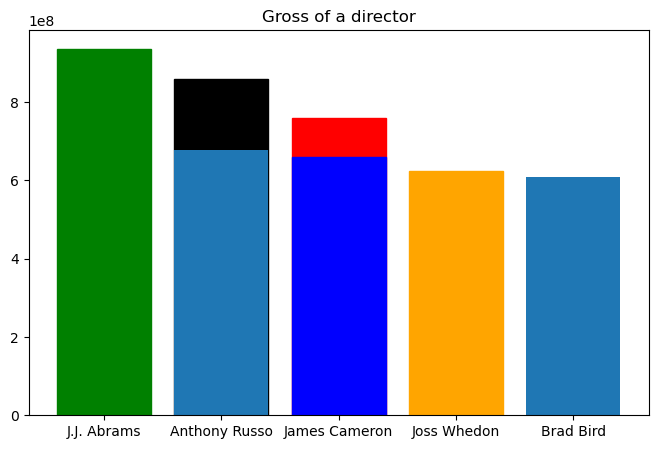

In [5]:
df.sort_values(["Gross"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)
df1=df[['Gross','Director']]
print(df1.head(5))
print("\n")
x=df1['Gross'].head(7)
y=df1['Director'].head(7)
fig = plt.figure(figsize = (8, 5))
bars=plt.bar(y,x)
plt.title("Gross of a director")
bars[0].set_color('green')
bars[1].set_color('black')
bars[2].set_color('red')
bars[4].set_color('blue')
bars[5].set_color('orange')

<h1>Q2. Which combination of actors are getting good gross?</h2>

    No_of_Votes              Star1
0       2343110        Tim Robbins
2       2303232     Christian Bale
8       2067042  Leonardo DiCaprio
9       1854740          Brad Pitt
6       1826188      John Travolta
11      1809221          Tom Hanks
14      1676426    Lilly Wachowski
10      1661481        Elijah Wood
5       1642758        Elijah Wood
1       1620367      Marlon Brando


    No_of_Votes                 Star2
0       2343110        Morgan Freeman
2       2303232          Heath Ledger
8       2067042  Joseph Gordon-Levitt
9       1854740         Edward Norton
6       1826188           Uma Thurman
11      1809221          Robin Wright
14      1676426          Keanu Reeves
10      1661481          Ian McKellen
5       1642758       Viggo Mortensen
1       1620367             Al Pacino


    No_of_Votes               Star3
0       2343110          Bob Gunton
2       2303232       Aaron Eckhart
8       2067042         Elliot Page
9       1854740           Meat Loaf
6       18261

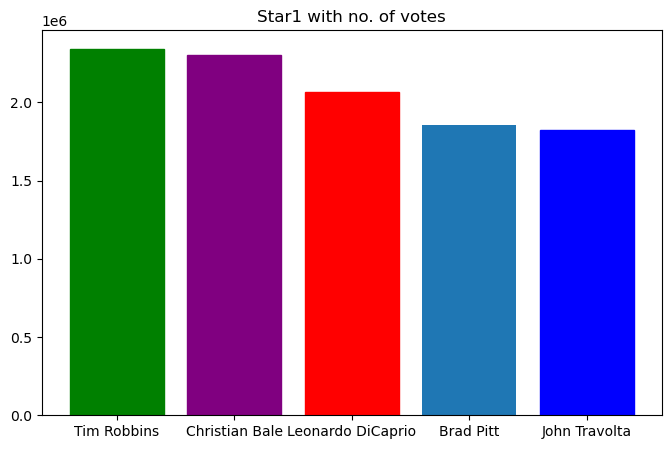

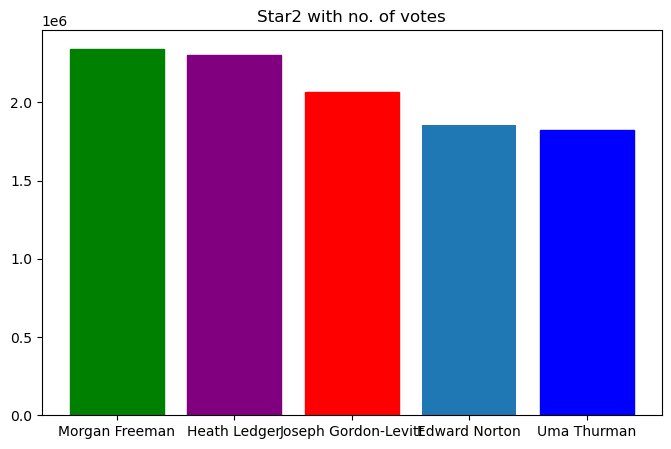

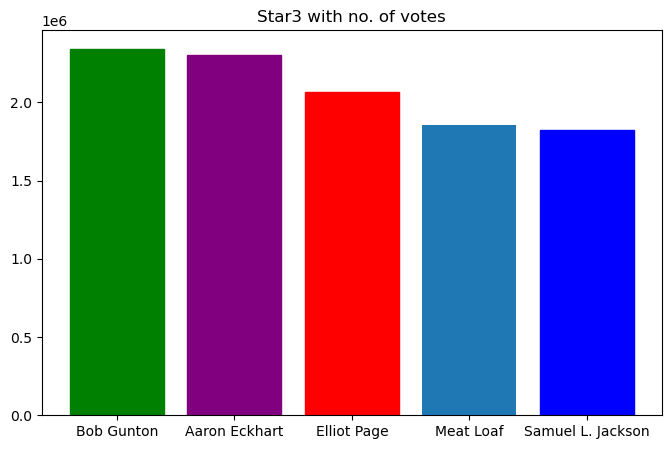

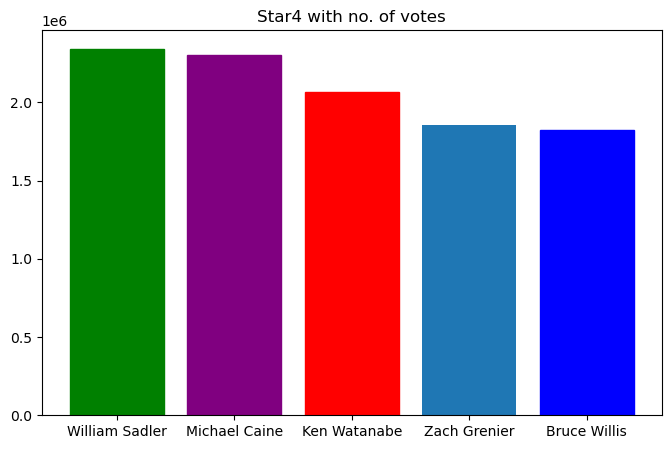

In [6]:
df3=df[['No_of_Votes','Star1']]
df3=df3.sort_values('No_of_Votes', ascending = False)
df3=df3.head(10)
print(df3)
print("\n")
x=df3['No_of_Votes'].head(5)
y=df3['Star1'].head(5)
fig = plt.figure(figsize = (8, 5))
bars=plt.bar(y,x)
plt.title("Star1 with no. of votes")
bars[0].set_color('green')
bars[1].set_color('purple')
bars[2].set_color('red')
bars[4].set_color('blue')
# bars[5].set_color('orange')

df4=df[['No_of_Votes','Star2']]
df4=df4.sort_values('No_of_Votes', ascending = False)
df4=df4.head(10)
print(df4)
print("\n")
x=df4['No_of_Votes'].head(5)
y=df4['Star2'].head(5)
fig = plt.figure(figsize = (8, 5))
bars=plt.bar(y,x)
plt.title("Star2 with no. of votes")
bars[0].set_color('green')
bars[1].set_color('purple')
bars[2].set_color('red')
bars[4].set_color('blue')
# bars[5].set_color('orange')


df5=df[['No_of_Votes','Star3']]
df5=df5.sort_values('No_of_Votes', ascending = False)
df5=df5.head(10)
print(df5)
print("\n")
x=df5['No_of_Votes'].head(5)
y=df5['Star3'].head(5)
fig = plt.figure(figsize = (8, 5))
bars =plt.bar(y,x)
plt.title("Star3 with no. of votes")
bars[0].set_color('green')
bars[1].set_color('purple')
bars[2].set_color('red')
bars[4].set_color('blue')
# bars[5].set_color('orange')


df6=df[['No_of_Votes','Star4']]
df6=df6.sort_values('No_of_Votes', ascending = False)
df6=df6.head(10)
print(df6)
print("\n")
x=df6['No_of_Votes'].head(5)
y=df6['Star4'].head(5)
fig = plt.figure(figsize = (8, 5))
bars=plt.bar(y,x)
plt.title("Star4 with no. of votes")
bars[0].set_color('green')
bars[1].set_color('purple')
bars[2].set_color('red')
bars[4].set_color('blue')
# bars[5].set_color('orange')

<h1> Q3. Analysis of the No_of_votes of a movie vs directors.?</h1>

    No_of_Votes              Director
0       2343110        Frank Darabont
2       2303232     Christopher Nolan
8       2067042     Christopher Nolan
9       1854740         David Fincher
6       1826188     Quentin Tarantino
11      1809221       Robert Zemeckis
14      1676426        Lana Wachowski
10      1661481         Peter Jackson
5       1642758         Peter Jackson
1       1620367  Francis Ford Coppola




Text(0.5, 1.0, 'Director with no. of votes')

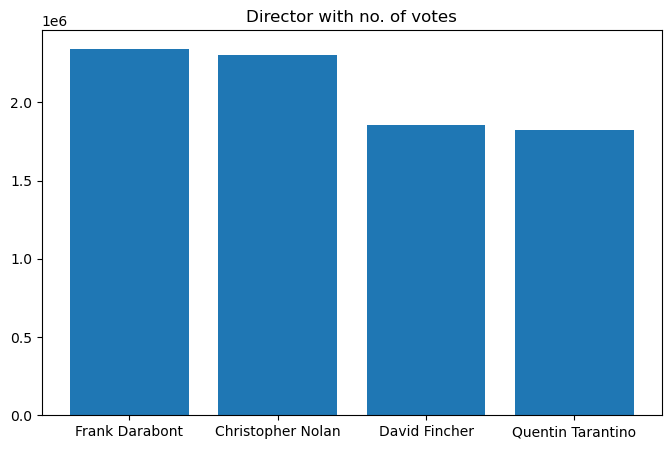

In [7]:
df7=df[['No_of_Votes','Director']]
df7=df7.sort_values('No_of_Votes', ascending = False)
df7=df7.head(10)
print(df7)
print("\n")
x=df7['No_of_Votes'].head(5)
y=df7['Director'].head(5)
fig = plt.figure(figsize = (8, 5))
plt.bar(y,x)
plt.title("Director with no. of votes")

<h1>Q4. Which combination of actors are getting good IMDB_Rating maximum time?</h1>

    IMDB_Rating           Star1
0           9.3     Tim Robbins
1           9.2   Marlon Brando
3           9.0       Al Pacino
2           9.0  Christian Bale
4           9.0     Henry Fonda
6           8.9   John Travolta
7           8.9     Liam Neeson
5           8.9     Elijah Wood
12          8.8  Clint Eastwood
10          8.8     Elijah Wood


    IMDB_Rating            Star2
0           9.3   Morgan Freeman
1           9.2        Al Pacino
3           9.0   Robert De Niro
2           9.0     Heath Ledger
4           9.0      Lee J. Cobb
6           8.9      Uma Thurman
7           8.9    Ralph Fiennes
5           8.9  Viggo Mortensen
12          8.8      Eli Wallach
10          8.8     Ian McKellen


    IMDB_Rating              Star3
0           9.3         Bob Gunton
1           9.2         James Caan
3           9.0      Robert Duvall
2           9.0      Aaron Eckhart
4           9.0      Martin Balsam
6           8.9  Samuel L. Jackson
7           8.9       Ben Kingsley
5

Text(0.5, 1.0, 'IMDB_Rating with Star4 ')

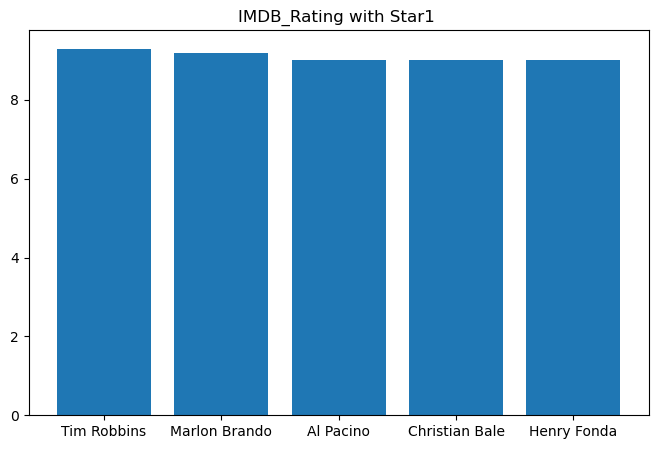

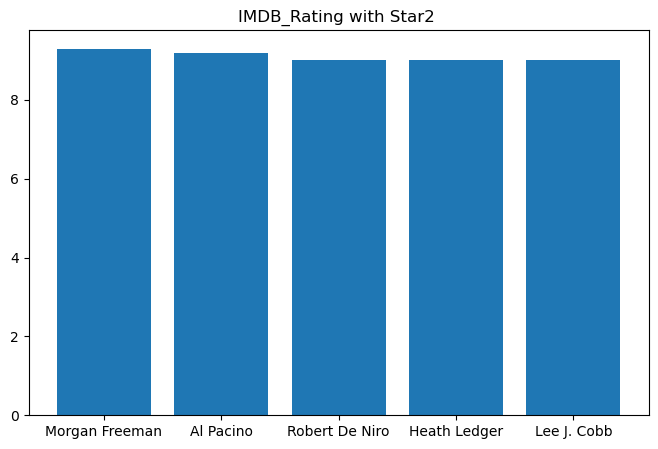

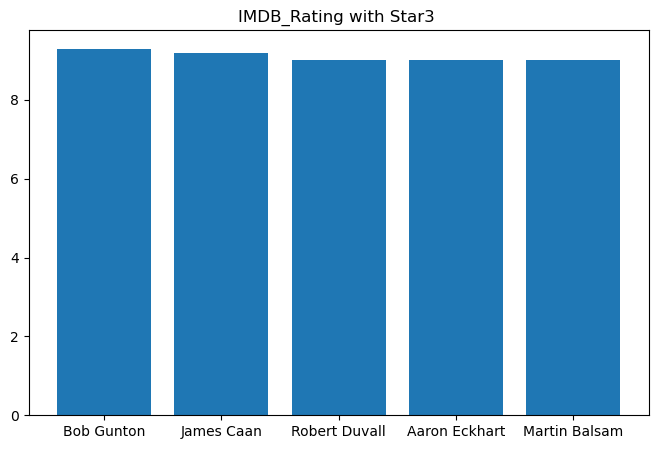

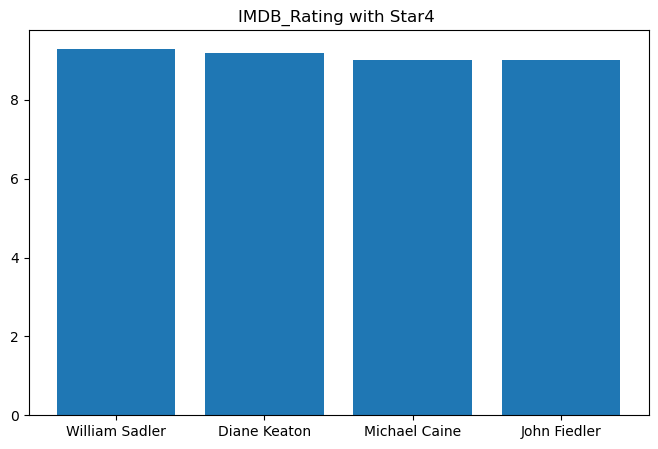

In [8]:
df8=df[['IMDB_Rating','Star1']]
df8=df8.sort_values('IMDB_Rating', ascending = False)
df8=df8.head(10)
print(df8)
print("\n")
x=df8['IMDB_Rating'].head(5)
y=df8['Star1'].head(5)
fig = plt.figure(figsize = (8, 5))
plt.bar(y,x)
plt.title("IMDB_Rating with Star1 ")

df9=df[['IMDB_Rating','Star2']]
df9=df9.sort_values('IMDB_Rating', ascending = False)
df9=df9.head(10)
print(df9)
print("\n")
x=df9['IMDB_Rating'].head(5)
y=df9['Star2'].head(5)
fig = plt.figure(figsize = (8, 5))
plt.bar(y,x)
plt.title("IMDB_Rating with Star2 ")

df10=df[['IMDB_Rating','Star3']]
df10=df10.sort_values('IMDB_Rating', ascending = False)
df10=df10.head(10)
print(df10)
print("\n")
x=df10['IMDB_Rating'].head(5)
y=df10['Star3'].head(5)
fig = plt.figure(figsize = (8, 5))
plt.bar(y,x)
plt.title("IMDB_Rating with Star3 ")

df11=df[['IMDB_Rating','Star4']]
df11=df11.sort_values('IMDB_Rating', ascending = False)
df11=df11.head(10)
print(df11)
print("\n")
x=df11['IMDB_Rating'].head(5)
y=df11['Star4'].head(5)
fig = plt.figure(figsize = (8, 5))
plt.bar(y,x)
plt.title("IMDB_Rating with Star4 ")

<h2>Q5. Most prefered Genre ?</h2>

In [9]:
df12={}
for i in df['Genre']:
    i=i.split(',')
    for j in range(len(i)):
        i[j]=i[j].replace(' ','')
        if i[j] in df12:
            df12[i[j]]+=1
        else:
            df12[i[j]]=1

In [10]:
df13=[]
for x,y in df12.items():
    df13.append([x,y])
df13

[['Action', 189],
 ['Adventure', 196],
 ['Sci-Fi', 67],
 ['Drama', 724],
 ['Fantasy', 66],
 ['Romance', 125],
 ['Animation', 82],
 ['Crime', 209],
 ['Family', 56],
 ['Comedy', 233],
 ['Thriller', 137],
 ['Mystery', 99],
 ['Biography', 109],
 ['Sport', 19],
 ['Horror', 32],
 ['War', 51],
 ['Music', 35],
 ['History', 56],
 ['Western', 20],
 ['Musical', 17],
 ['Film-Noir', 19]]

In [15]:
df14=pd.DataFrame(df13,columns=['Genre','Number'])
df14
df14.sort_values(["Number"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)
df14.head(10)

,Genre,Number
3,Drama,724
9,Comedy,233
7,Crime,209
1,Adventure,196
0,Action,189
10,Thriller,137
5,Romance,125
12,Biography,109
11,Mystery,99
6,Animation,82


Text(0.5, 1.0, 'Movies of Diffrent Genres')

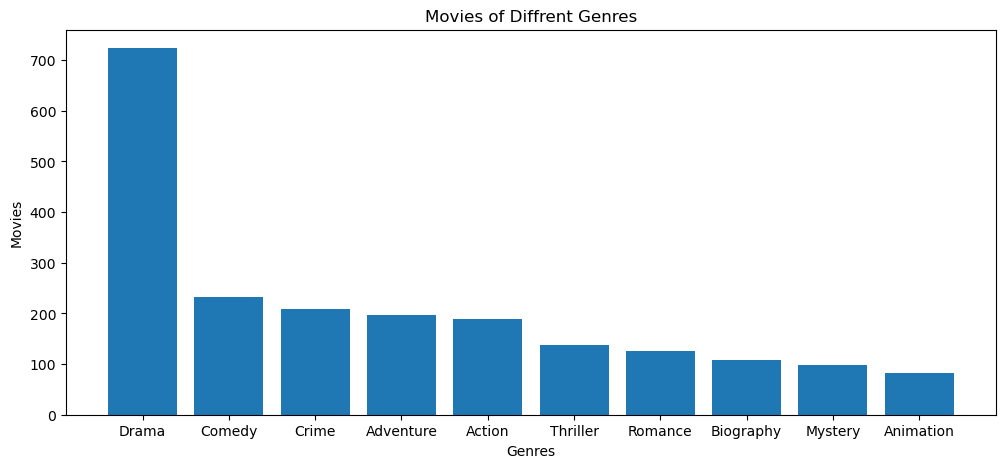

In [14]:
x= df14["Number"].head(10)
y = df14["Genre"].head(10)
fig = plt.figure(figsize = (12, 5))
plt.bar(y,x)
plt.xlabel("Genres")
plt.ylabel("Movies")
plt.title("Movies of Diffrent Genres")
